In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from pandas import DataFrame, Series
from collections import Counter
from nltk.corpus import stopwords
from PIL import Image
%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
!pip install wordcloud

     |████████████████████████████████| 368kB 3.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from wordcloud import WordCloud, ImageColorGenerator

In [5]:
df = pd.read_csv('Tweet.csv')

In [6]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,#DDay75thAnniversary https://t.co/0fYfpvUghk,06-06-2019 11:50:25,4779.0,17600,false,1.136601e+18
1,Twitter for iPhone,Heading over to Normandy to celebrate some of ...,06-06-2019 07:38:28,11222.0,45694,false,1.136538e+18
2,Twitter for iPhone,A big and beautiful day today!,06-06-2019 05:57:16,13998.0,78732,false,1.136512e+18
3,Twitter for iPhone,“The President has received glowing reviews fr...,06-06-2019 05:55:49,10537.0,42291,false,1.136512e+18
4,Twitter for iPhone,#DDay75thAnniversary #DDay75 https://t.co/BwfV...,06-06-2019 05:40:23,11087.0,39223,false,1.136508e+18


In [7]:
df['is_retweet'].value_counts()

false                 34017
true                   1613
98482327390396416         1
101013255950053376        1
115846232714391552        1
Name: is_retweet, dtype: int64

In [8]:
df[df['is_retweet'].isin(['115846232714391552','101013255950053376', '98482327390396416'])]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
35173,My in… (cont) http://t.co/YNX1msYh,09-19-2011 17:54:28,18,7.0,false,115846232714391552,NaN
35297,#Apprentice Andy and I talk about politics an…...,08-09-2011 19:33:31,20,3.0,false,101013255950053376,NaN
35322,My interview yesterday on CNBC's Squawk Box...,08-02-2011 19:56:31,13,12.0,false,98482327390396416,NaN


In [9]:
df = df.drop(df.index[[35173, 35297, 35322]])

In [10]:
df[df['is_retweet'].isin(['115846232714391552','101013255950053376', '98482327390396416'])]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str


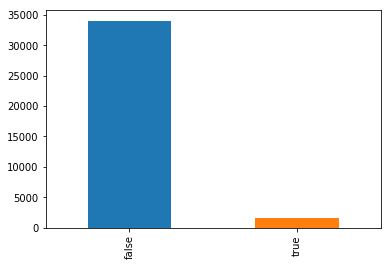

In [11]:
df['is_retweet'].value_counts().plot(kind='bar')

In [12]:
df = df[pd.notnull(df['text'])]

In [13]:
def getMention(text):
    mention = re.findall('(^|[^@\w])@(\w{1,15})', text)
    if len(mention) > 0:
        strMention = ''
        for x in mention:
            strMention += x[1] + ","
        return strMention[:-1]
        #         return [x[1] for x in mention
    else:
        return 'No Mentions'

In [14]:
df['mention'] = df['text'].apply(getMention)

In [15]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,mention
0,Twitter for iPhone,#DDay75thAnniversary https://t.co/0fYfpvUghk,06-06-2019 11:50:25,4779.0,17600,false,1.136601e+18,No Mentions
1,Twitter for iPhone,Heading over to Normandy to celebrate some of ...,06-06-2019 07:38:28,11222.0,45694,false,1.136538e+18,No Mentions
2,Twitter for iPhone,A big and beautiful day today!,06-06-2019 05:57:16,13998.0,78732,false,1.136512e+18,No Mentions
3,Twitter for iPhone,“The President has received glowing reviews fr...,06-06-2019 05:55:49,10537.0,42291,false,1.136512e+18,"seanhannity,maddow,CNN"
4,Twitter for iPhone,#DDay75thAnniversary #DDay75 https://t.co/BwfV...,06-06-2019 05:40:23,11087.0,39223,false,1.136508e+18,No Mentions


In [16]:
df_Mentions = pd.concat([Series(row['is_retweet'], row['mention'].split(','))              
                    for _, row in df.iterrows()]).reset_index()

In [17]:
df_Mentions.columns = ['mention', 'is_retweet']

In [18]:
df_Mentions.head()

,mention,is_retweet
0,No Mentions,false
1,No Mentions,false
2,No Mentions,false
3,seanhannity,false
4,maddow,false


In [19]:
df_Mentions = df_Mentions[(df_Mentions['mention'] != 'No Mentions')]

In [20]:
topMentions = Counter(df_Mentions['mention']).most_common(20)

In [21]:
topMentionsDict = {str(topMentions[i]).split(',')[0].replace('(', '').strip('\''): int(str(topMentions[i]).split(',')[1].replace(')','').strip('\'').strip()) for i in range(0, len(topMentions))}

In [22]:
topMentionsDict

{'realDonaldTrump': 8802,
 'BarackObama': 732,
 'FoxNews': 595,
 'foxandfriends': 535,
 'ApprenticeNBC': 391,
 'MittRomney': 314,
 'CNN': 295,
 'IvankaTrump': 248,
 'WhiteHouse': 235,
 'seanhannity': 164,
 'EricTrump': 157,
 'megynkelly': 154,
 'oreillyfactor': 134,
 'DonaldJTrumpJr': 131,
 'Macys': 130,
 'nytimes': 128,
 'CelebApprentice': 127,
 'TrumpDoral': 124,
 'GOP': 114,
 'TrumpChicago': 101}

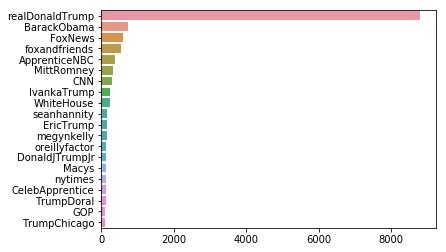

In [23]:
sns.barplot(x=list(topMentionsDict.values()), y=list(topMentionsDict.keys()))

In [24]:
df_SelfMention = df[(df['text'].str.contains('realDonaldTrump'))]

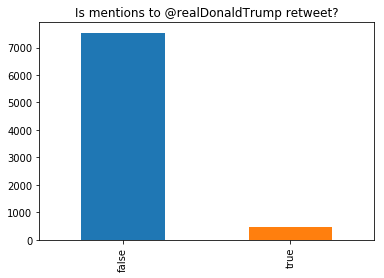

In [25]:
df_SelfMention['is_retweet'].value_counts().plot(kind='bar', title='Is mentions to @realDonaldTrump retweet?')

In [26]:
df['date'] = pd.to_datetime(df['created_at']).dt.date

In [27]:
df['time'] = pd.to_datetime(df['created_at']).dt.time

In [28]:
df['hour'] = pd.to_datetime(df['created_at']).dt.hour

In [29]:
df.head(50)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,mention,date,time,hour
0,Twitter for iPhone,#DDay75thAnniversary https://t.co/0fYfpvUghk,06-06-2019 11:50:25,4779.0,17600,false,1.136601e+18,No Mentions,2019-06-06,11:50:25,11.0
1,Twitter for iPhone,Heading over to Normandy to celebrate some of ...,06-06-2019 07:38:28,11222.0,45694,false,1.136538e+18,No Mentions,2019-06-06,07:38:28,7.0
2,Twitter for iPhone,A big and beautiful day today!,06-06-2019 05:57:16,13998.0,78732,false,1.136512e+18,No Mentions,2019-06-06,05:57:16,5.0
3,Twitter for iPhone,“The President has received glowing reviews fr...,06-06-2019 05:55:49,10537.0,42291,false,1.136512e+18,"seanhannity,maddow,CNN",2019-06-06,05:55:49,5.0
4,Twitter for iPhone,#DDay75thAnniversary #DDay75 https://t.co/BwfV...,06-06-2019 05:40:23,11087.0,39223,false,1.136508e+18,No Mentions,2019-06-06,05:40:23,5.0
5,Twitter for iPhone,Immigration discussions at the White House wit...,06-05-2019 22:42:39,18868.0,75541,false,1.136403e+18,No Mentions,2019-06-05,22:42:39,22.0
6,Twitter for iPhone,....talks with Mexico will resume tomorrow wit...,06-05-2019 22:42:39,18092.0,75686,false,1.136403e+18,No Mentions,2019-06-05,22:42:39,22.0
7,Twitter for iPhone,As we approach the 75th Anniversary of D-Day w...,06-05-2019 12:18:50,19367.0,75560,false,1.136246e+18,No Mentions,2019-06-05,12:18:50,12.0
8,Twitter for iPhone,“House Republicans support the President on Ta...,06-05-2019 08:20:14,16200.0,65277,false,1.136186e+18,GOPLeader,2019-06-05,08:20:14,8.0
9,Twitter for iPhone,If the totally Corrupt Media was less corrupt ...,06-05-2019 08:17:07,18597.0,85804,false,1.136185e+18,No Mentions,2019-06-05,08:17:07,8.0


In [30]:
tweet_time = df['time'].value_counts().to_dict()

In [31]:
tweet_time

{datetime.time(20, 40, 19): 7,
 datetime.time(19, 14, 10): 5,
 datetime.time(20, 7, 50): 5,
 datetime.time(21, 35, 41): 5,
 datetime.time(20, 36, 52): 5,
 datetime.time(20, 4, 45): 5,
 datetime.time(20, 38, 20): 5,
 datetime.time(23, 13, 47): 5,
 datetime.time(19, 49, 23): 5,
 datetime.time(20, 51, 55): 5,
 datetime.time(18, 54, 14): 5,
 datetime.time(19, 39, 29): 5,
 datetime.time(21, 26, 47): 5,
 datetime.time(20, 28, 22): 5,
 datetime.time(17, 59, 12): 5,
 datetime.time(13, 33, 15): 5,
 datetime.time(18, 20, 41): 5,
 datetime.time(19, 25, 3): 5,
 datetime.time(18, 59, 31): 4,
 datetime.time(10, 55, 30): 4,
 datetime.time(21, 25, 5): 4,
 datetime.time(12, 26, 18): 4,
 datetime.time(16, 26, 20): 4,
 datetime.time(20, 23, 47): 4,
 datetime.time(15, 29, 38): 4,
 datetime.time(3, 23, 51): 4,
 datetime.time(12, 18, 56): 4,
 datetime.time(16, 38, 18): 4,
 datetime.time(21, 2, 23): 4,
 datetime.time(12, 7, 36): 4,
 datetime.time(19, 1, 26): 4,
 datetime.time(1, 23, 49): 4,
 datetime.time(20

<Figure size 1440x1080 with 0 Axes>

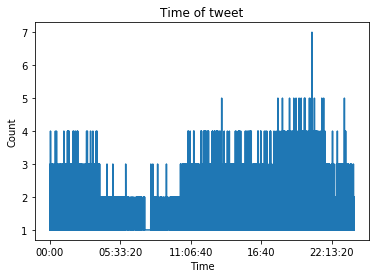

<Figure size 1440x1080 with 0 Axes>

In [32]:
sns.lineplot(x=list(tweet_time.keys()), y=list(tweet_time.values()))
plt.title("Time of tweet")
plt.xlabel("Time")
plt.ylabel("Count")
plt.figure(figsize=(20, 15))

In [33]:
tweet_hour = df['hour'].value_counts().to_dict()

<Figure size 2160x1080 with 0 Axes>

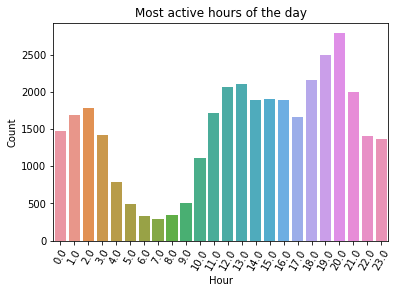

<Figure size 2160x1080 with 0 Axes>

In [34]:
sns.barplot(x=list(tweet_hour.keys()), y=list(tweet_hour.values()))
plt.title("Most active hours of the day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.figure(figsize=(30, 15))

In [70]:
tweetList = list()
def tweet_process(tweets):
    lemmatization = nltk.WordNetLemmatizer()
    for tweet in tweets:
        tweet = re.sub("[^a-zA-Z]", " ", tweet)
        tweet = tweet.lower()
        tweet = nltk.word_tokenize(tweet)
        tweet = [i for i in tweet if i not in set(stopwords.words("english"))]
        tweet = [lemmatization.lemmatize(i)for i in tweet]
        strOmitList = ["http", "u", "w", "realdonaldtrump", "donald trump", "rt", "co", "mr", "amp", "false web", "web client", "android", "web", "false android", "trump", "donald", "mr trump", "president", "twitter", "twitter web", "twitter android", "cont", "via"]
        tweet = [i for i in tweet if i not in strOmitList]
        tweet = " ".join(tweet)
        tweetList.append(tweet)
    allTweets = ' '.join(tweetList)
    return allTweets

In [46]:
Counter(allTweets.split()).most_common(100)

[('great', 5592),
 ('false', 2988),
 ('thank', 2487),
 ('people', 2245),
 ('thanks', 2175),
 ('country', 1880),
 ('get', 1867),
 ('time', 1784),
 ('america', 1736),
 ('obama', 1701),
 ('would', 1684),
 ('new', 1638),
 ('make', 1603),
 ('job', 1548),
 ('like', 1508),
 ('one', 1490),
 ('good', 1453),
 ('need', 1416),
 ('big', 1378),
 ('year', 1348),
 ('vote', 1203),
 ('today', 1202),
 ('run', 1201),
 ('never', 1183),
 ('want', 1182),
 ('many', 1169),
 ('love', 1168),
 ('back', 1101),
 ('american', 1078),
 ('going', 1041),
 ('state', 1029),
 ('best', 1005),
 ('much', 998),
 ('think', 989),
 ('show', 970),
 ('know', 959),
 ('see', 954),
 ('news', 940),
 ('go', 938),
 ('day', 928),
 ('client', 907),
 ('border', 895),
 ('deal', 879),
 ('must', 877),
 ('really', 861),
 ('hillary', 861),
 ('true', 859),
 ('democrat', 849),
 ('win', 840),
 ('work', 827),
 ('last', 800),
 ('look', 795),
 ('tonight', 783),
 ('republican', 781),
 ('china', 769),
 ('world', 768),
 ('even', 761),
 ('say', 752),
 ('b

(-0.5, 399.5, 199.5, -0.5)

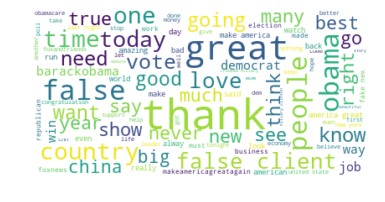

In [47]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(allTweets)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [48]:
trump_mask = np.array(Image.open("trump.png"))

In [49]:
trump_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [50]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [51]:
transformed_trump_mask = np.ndarray((trump_mask.shape[0],trump_mask.shape[1]), np.int32)

for i in range(len(trump_mask)):
    transformed_trump_mask[i] = list(map(transform_format, trump_mask[i]))

In [52]:
transformed_trump_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

(-0.5, 1418.5, 945.5, -0.5)

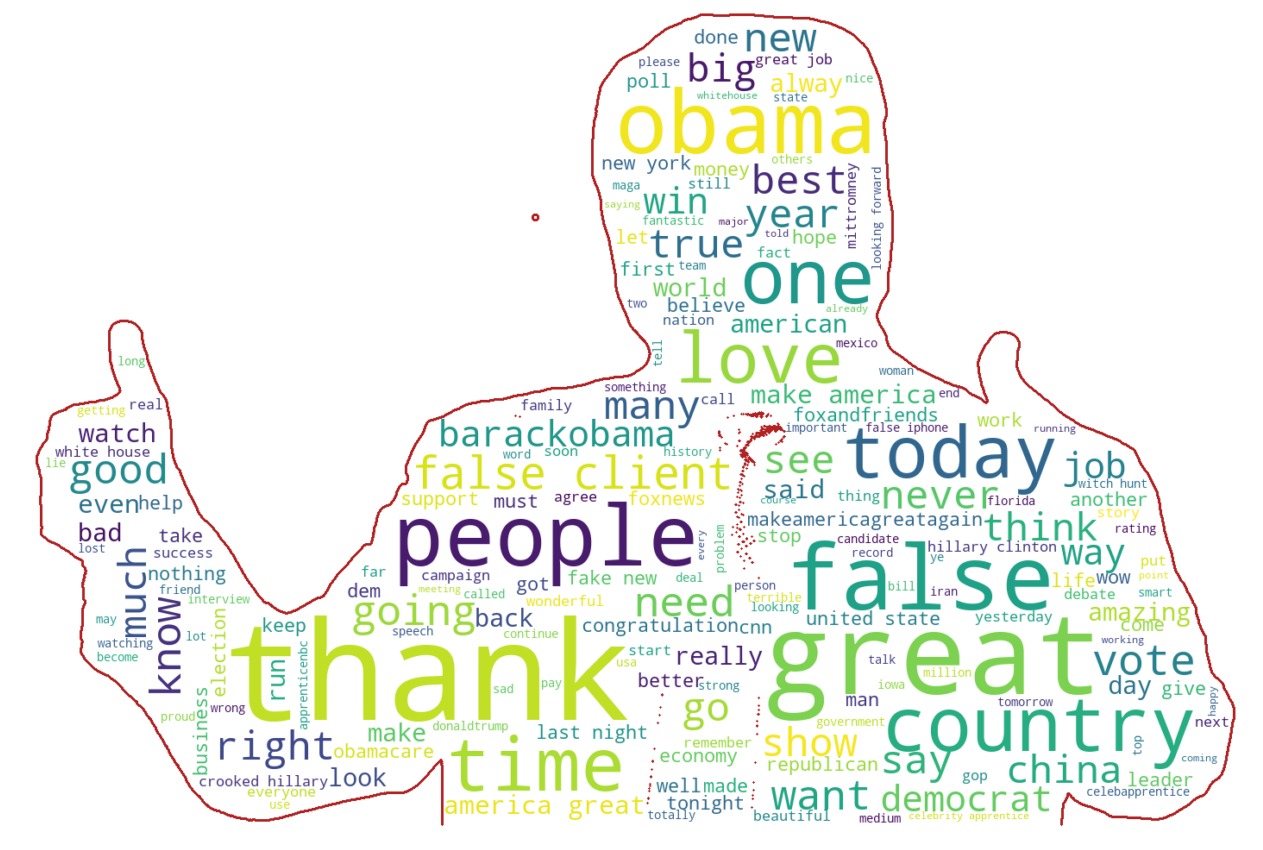

In [54]:
wc = WordCloud(background_color="white", max_words=200, mask=transformed_trump_mask,
            contour_width=3, contour_color='firebrick').generate(allTweets)
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
from textblob import TextBlob

In [97]:
blob1 = TextBlob(df['text'][25253])
blob1

TextBlob("“If it’s worth doing it’s worth fighting for. You’ll have lots of people and obstacles in your way. Work &amp; fight to get beyond them."")

In [98]:
blob1.sentiment.polarity

0.18333333333333332